In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks")

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('DDHealth_cat.csv')

In [3]:
df.head()

,ccaa,prov,res,sex,age,educ,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_pc,int_mobile,int_tablet,int_freq,int_work,int_public,int_medical3,int_medical24,int_medical2019,int_medical_help,general_health,chronic,limit,pain,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
0,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 50 a 64 años,Educación secundaria,Conviviendo en pareja,Casado/a,3,Está en paro,Con cierta dificultad,1,"Sí, todos",No contesta,Todos los días,No,Sí,Sí,No,Cada día,No,No,No,No,No,No,Muy malo,"Sí, más de uno",Limitado,Moderado,Más de 12 meses,Entre 1 y 12 meses,No,No fumo actualmente pero he fumado antes,No contesta,Nunca,No contesta,Nunca,Una vez al mes,Siempre,"No, ninguna dificultad","No, nunca",Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Muy fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
1,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,Sí,Sí,No,Cada día,No,No,No,No,No,No,Malo,"Sí, más de uno",No limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,Cada día,No,No,Sí,Sí,Si regularmente,No,Bueno,No,No limitado,Moderado,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,No,Educación superior,Todos los días,No,Sí,Sí,No,Cada día,No,No,No,No,No,No,Malo,"Sí, más de uno",Limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,No conviviendo en pareja,Divorciado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,2,No,Educación superior,Todos los días,No,Sí,Sí,No,Cada día,No,No,No,No,No,Si regularmente,Muy malo,"Sí, uno",Gravemente limitado,Severo,En las últimas 4 semanas,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Varias veces a la semana,Varias veces a la semana,Siempre,Alguna dificultad pero puedo usar móbiles/orde...,"Sí, siempre",Muy difícil,Muy difícil,Fácil,Difícil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Fácil,Fácil,Fácil


In [4]:
df.shape

(2011, 58)

In [5]:
# Check unique values
counts = {}
for column in df:
    counts[column] = df[column].value_counts()
    print(f"\n{column}:\n{counts[column]}")



ccaa:
Andalucía              366
Cataluña               349
Comunidad de Madrid    270
Com. Valenciana        155
Galicia                129
País Vasco             106
Castilla y León        105
Canarias                99
Castilla la Mancha      72
Región de Murcia        65
Aragón                  62
Asturias                51
Extremadura             50
Illes Balears           46
Navarra                 35
Cantabria               31
La Rioja                20
Name: ccaa, dtype: int64

prov:
Barcelona      278
Madrid         202
Valencia       121
Sevilla        100
Cádiz           80
Murcia          65
Málaga          57
La Coruña       52
Las Palmas      52
Asturias        51
Pontevedra      49
Tenerife        47
Albacete        47
Balears         46
Guipúzcoa       46
Vizcaya         46
Zaragoza        43
Granada         42
Álava           41
Navarra         35
Gerona          32
Badajoz         32
Cantabria       31
Jaén            30
Valladolid      27
Córdoba         25
León    

In [6]:
df['sex'].replace({"Mujer": 'Women', "Hombre": 'Men'}, inplace=True)
df['sex'].value_counts()

Women    1072
Men       939
Name: sex, dtype: int64

In [7]:
df['educ'].replace({"Primera etapa de secundaria": "Educación secundaria"}, inplace=True)

def clean_educ(x):
    if x in ['Educación superior']:
        return 'High education'
    else:
        return 'Low education'  
df['educ'] = df['educ'].map(clean_educ) 


df['educ'].value_counts()

Low education     1388
High education     623
Name: educ, dtype: int64

In [8]:
def clean_financial(x):
    if x in ['Con mucha dificultad','Con cierta dificultad', 'Con dificultad']:
        return 'Difficult'
    else:
        return 'Stable or good'

df['financial'] = df['financial'].map(clean_financial)
df['financial'].value_counts()

Stable or good    1229
Difficult          782
Name: financial, dtype: int64

In [9]:
def clean_int_limitations(x):
    if x in ['No, ninguna dificultad', 'No sabe', 'No contesta']:
        return 'No difficulties'
    else:
        return 'Difficulties'
    
df['int_limitations'] = df['int_limitations'].map(clean_int_limitations)
df['int_limitations'].value_counts()

No difficulties    1750
Difficulties        261
Name: int_limitations, dtype: int64

In [10]:
def clean_happy(x):
    if x in ['Muy infeliz', 'Bastante Infeliz']:
        return 'Unhappy'
    elif x == 'Neutral':
        return 0.33
    else:
        return 'happy'

df['happy'] = df['happy'].map(clean_happy)
df['happy'].value_counts()

happy      1898
Unhappy     113
Name: happy, dtype: int64

In [11]:
def clean_marital(x):
    if x in ['Casado/a']:
        return 'Married'
    elif x in ['Soltero/a']:
        return 'Single'
    else:
        return 'Other'  
df['marital'] = df['marital'].map(clean_marital) 
df['marital'].value_counts()

Married    1483
Other       288
Single      240
Name: marital, dtype: int64

In [12]:
def clean_social_contact(x):
    if x in ['Cada día', 'Varias veces a la semana', 'Una vez a la semana','No contesta', 'No sabe']:
        return 'Weekly'
    elif x in ['Varias veces al mes','Una vez al mes']:
        return 'Monthly'
    else:
        return 'Less than once per month'  
    
df['social_contact'] = df['social_contact'].map(clean_social_contact)
df['social_contact'].value_counts()

Weekly                      1309
Monthly                      392
Less than once per month     310
Name: social_contact, dtype: int64

In [13]:
def clean_loneliness(x):
    if x in ['A menudo/siempre', 'Algunas veces']:
        return 'Always or frequently'
    elif x in ['Ocasionalmente', 'Casi nunca']: 
        return 'Sometimes'
    else:
        return 'Never'

df['loneliness'] = df['loneliness'].map(clean_loneliness)
df['loneliness'].value_counts()

Never                   939
Sometimes               738
Always or frequently    334
Name: loneliness, dtype: int64

In [14]:
def clean_general_health(x):
    if x in ['Muy malo','Malo', 'Regular']:
        return 'Bad'
    else:
        return 'Good'

df['general_health'] = df['general_health'].map(clean_general_health)
df['general_health'].value_counts()

Good    1282
Bad      729
Name: general_health, dtype: int64

In [15]:
def clean_satisfaction(x):
    if x in ['Muy insatisfecho','Bastante insatisfecho', 'Regular']:
        return 'Not Satisfied'
    else:
        return 'Satisfied'

df['satisfaction'] = df['satisfaction'].map(clean_satisfaction)
df['satisfaction'].value_counts()

Satisfied        1470
Not Satisfied     541
Name: satisfaction, dtype: int64

In [16]:
def clean_medical_help(x):
    if x == 'No':
        return 'No'
    else:
        return 'Si'

df['int_medical_help'] = df['int_medical_help'].map(clean_medical_help)
df['int_medical_help'].value_counts()

No    1599
Si     412
Name: int_medical_help, dtype: int64

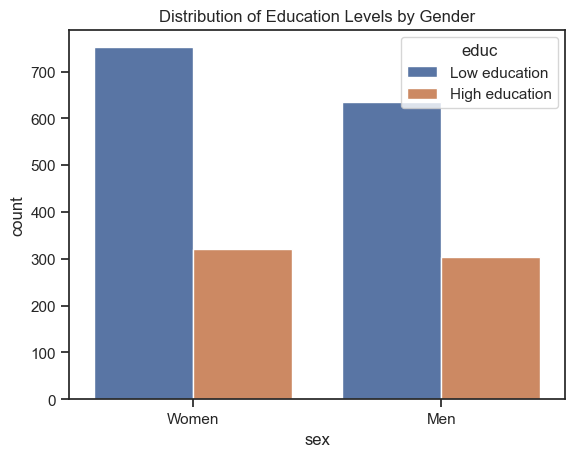

In [17]:
sns.countplot(x='sex', hue='educ', data=df)
plt.title('Distribution of Education Levels by Gender')
plt.show()


This initial graph provides a basic count of individuals in each education level categorized by gender. However, its utility is limited as the sample contains more women than men, potentially skewing the interpretation of absolute counts. 
To address the imbalance in the data and enable a more accurate comparisons I will use a normalization approach. 
By calculating the percentage distribution of individuals within each education level separately for men and women, the second graph offers a clearer understanding of the proportion of individuals at different education levels relative to the total number within each gender group. This normalized perspective facilitates a more meaningful and equitable comparison, for this reason, I will use this approach in all the study. 

## Education

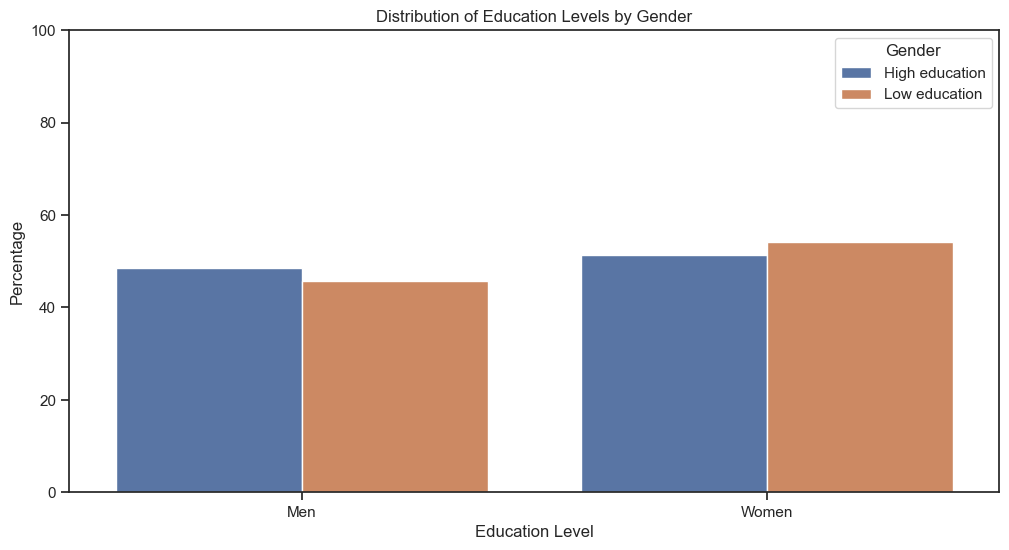

In [18]:

# Count the number of men and women in each education level
educ_by_sex = df.groupby(['educ', 'sex']).size().reset_index(name='count')

# Normalize the counts within each education level
educ_total = educ_by_sex.groupby('educ')['count'].transform('sum')
educ_by_sex['percentage'] = (educ_by_sex['count'] / educ_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='percentage', hue='educ', data=educ_by_sex, bottom=0)
plt.title('Distribution of Education Levels by Gender')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


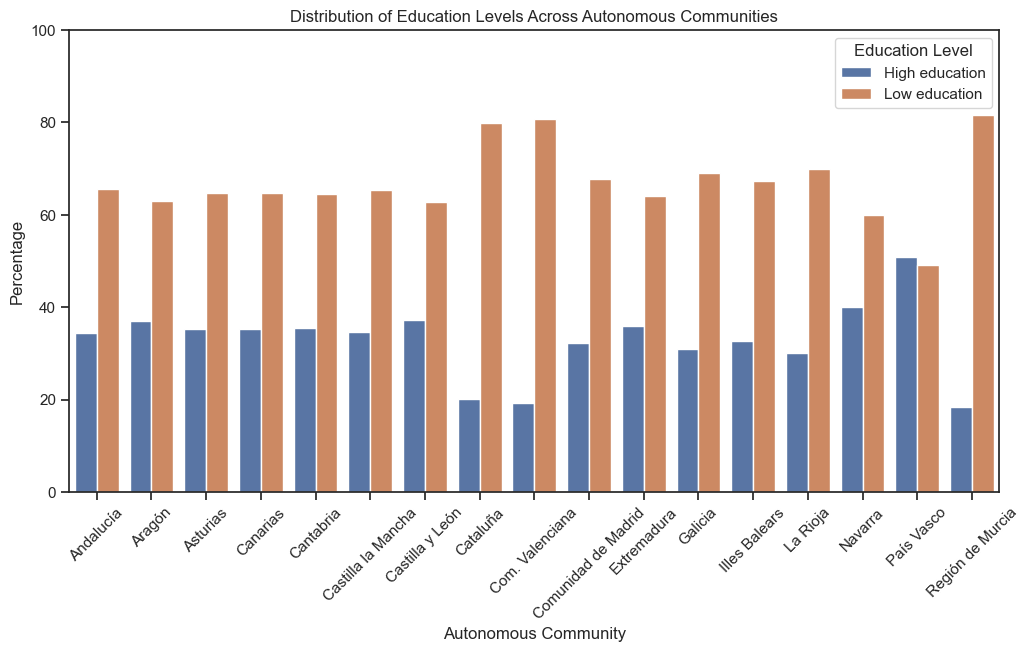

In [19]:
# Count the number of individuals in each education level and autonomous community
educ_by_ccaa = df.groupby(['ccaa', 'educ']).size().reset_index(name='count')

# Normalize the counts within each autonomous community
ccaa_total = educ_by_ccaa.groupby('ccaa')['count'].transform('sum')
educ_by_ccaa['percentage'] = (educ_by_ccaa['count'] / ccaa_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='ccaa', y='percentage', hue='educ', data=educ_by_ccaa, bottom=0)
plt.title('Distribution of Education Levels Across Autonomous Communities')
plt.xlabel('Autonomous Community')
plt.ylabel('Percentage')
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


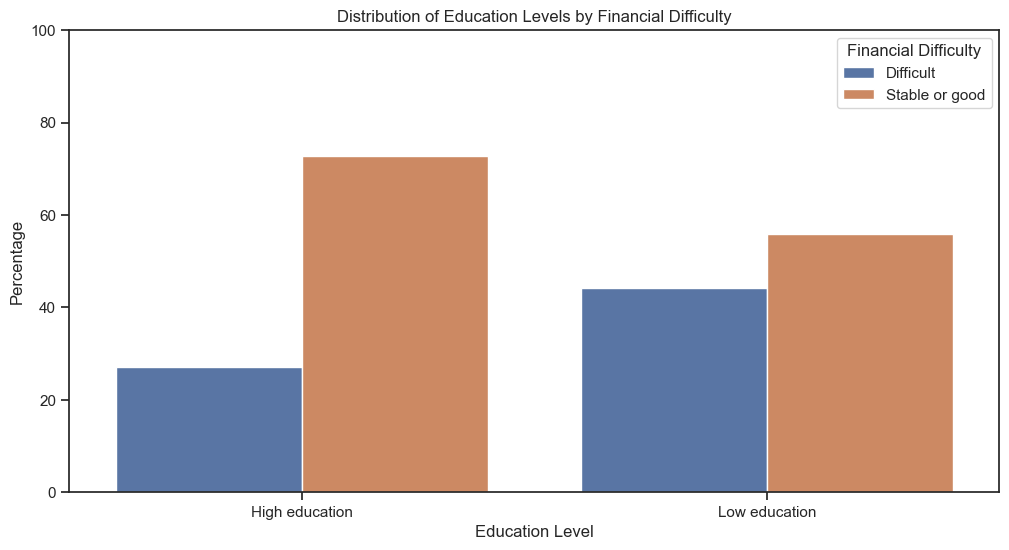

In [20]:
# Count the number of individuals in each education level and financial difficulty
educ_by_financial = df.groupby(['educ', 'financial']).size().reset_index(name='count')

# Normalize the counts within each education level
educ_total = educ_by_financial.groupby('educ')['count'].transform('sum')
educ_by_financial['percentage'] = (educ_by_financial['count'] / educ_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='educ', y='percentage', hue='financial', data=educ_by_financial, bottom=0)
plt.title('Distribution of Education Levels by Financial Difficulty')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Financial Difficulty')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


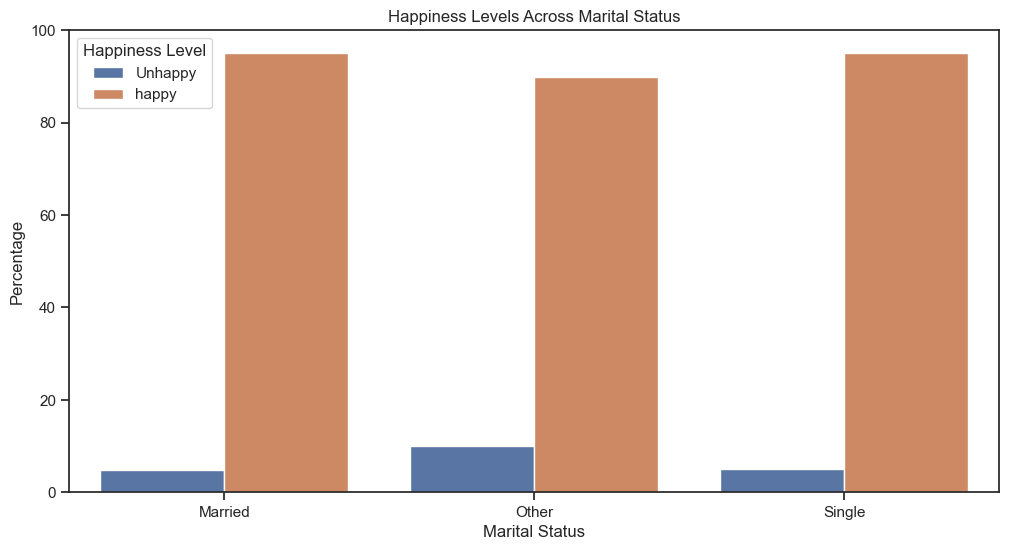

In [21]:
# Count the number of individuals in each marital status and happiness level
marital_by_happy = df.groupby(['marital', 'happy']).size().reset_index(name='count')

# Normalize the counts within each marital status
marital_total = marital_by_happy.groupby('marital')['count'].transform('sum')
marital_by_happy['percentage'] = (marital_by_happy['count'] / marital_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='marital', y='percentage', hue='happy', data=marital_by_happy, bottom=0)
plt.title('Happiness Levels Across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Happiness Level')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()

C:\Users\laiag\AppData\Local\Temp\ipykernel_15564\4126725305.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  normalized_data = df.groupby(['int_use', 'social_contact', 'happy']).size().groupby(level=[0, 1]).apply(lambda x: 100 * x / x.sum()).reset_index(name='percentage')
C:\Users\laiag\AppData\Local\Temp\ipykernel_15564\4126725305.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='int_use', y='percentage', hue='social_contact', col='happy', data=normalized_data, kind='bar', ci=None, height=6, aspect=1)


<Figure size 1500x800 with 0 Axes>

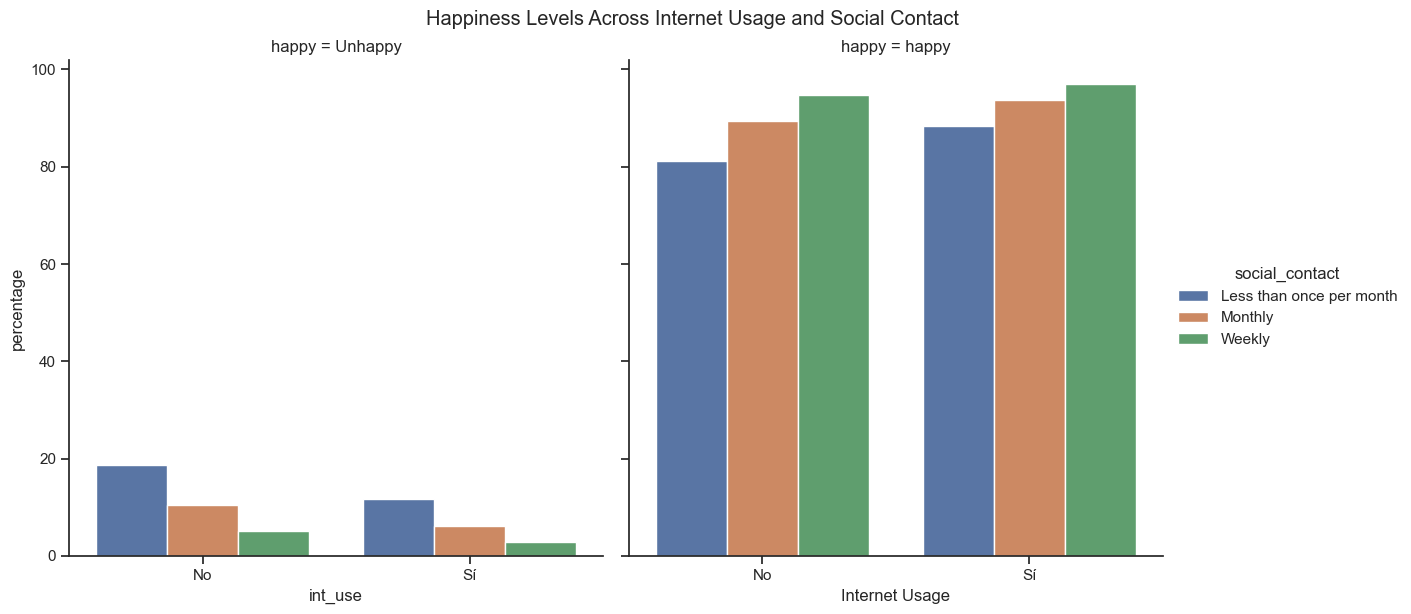

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
normalized_data = df.groupby(['int_use', 'social_contact', 'happy']).size().groupby(level=[0, 1]).apply(lambda x: 100 * x / x.sum()).reset_index(name='percentage')

plt.figure(figsize=(15, 8))
sns.catplot(x='int_use', y='percentage', hue='social_contact', col='happy', data=normalized_data, kind='bar', ci=None, height=6, aspect=1)
plt.suptitle('Happiness Levels Across Internet Usage and Social Contact', y=1.02)
plt.xlabel('Internet Usage')
plt.ylabel('Percentage')
plt.show()


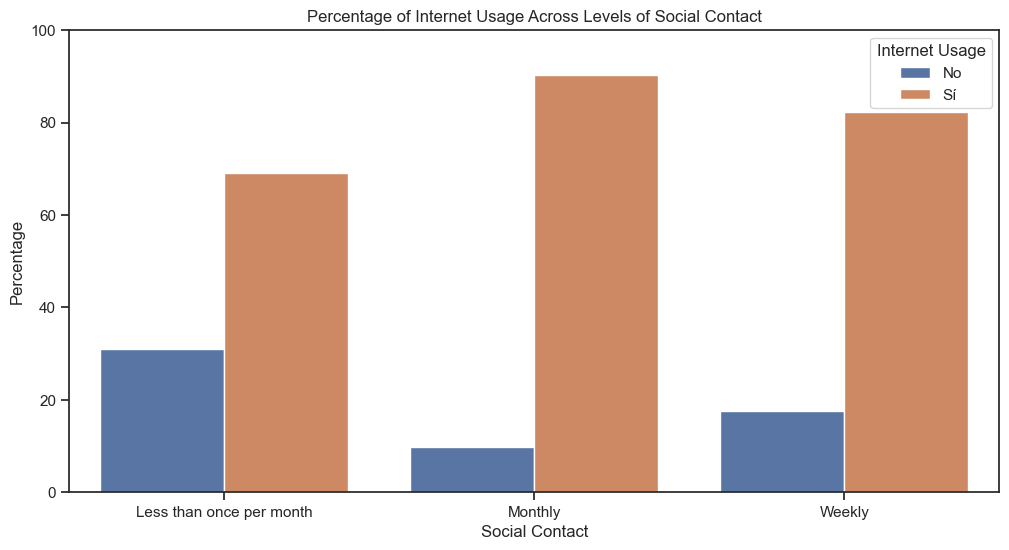

In [23]:
# Count the number of individuals in each category of social contact and internet usage
social_contact_by_int_use = df.groupby(['social_contact', 'int_use']).size().reset_index(name='count')

# Normalize the counts within each category of social contact
social_contact_total = social_contact_by_int_use.groupby('social_contact')['count'].transform('sum')
social_contact_by_int_use['percentage'] = (social_contact_by_int_use['count'] / social_contact_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='social_contact', y='percentage', hue='int_use', data=social_contact_by_int_use, bottom=0)
plt.title('Percentage of Internet Usage Across Levels of Social Contact')
plt.xlabel('Social Contact')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


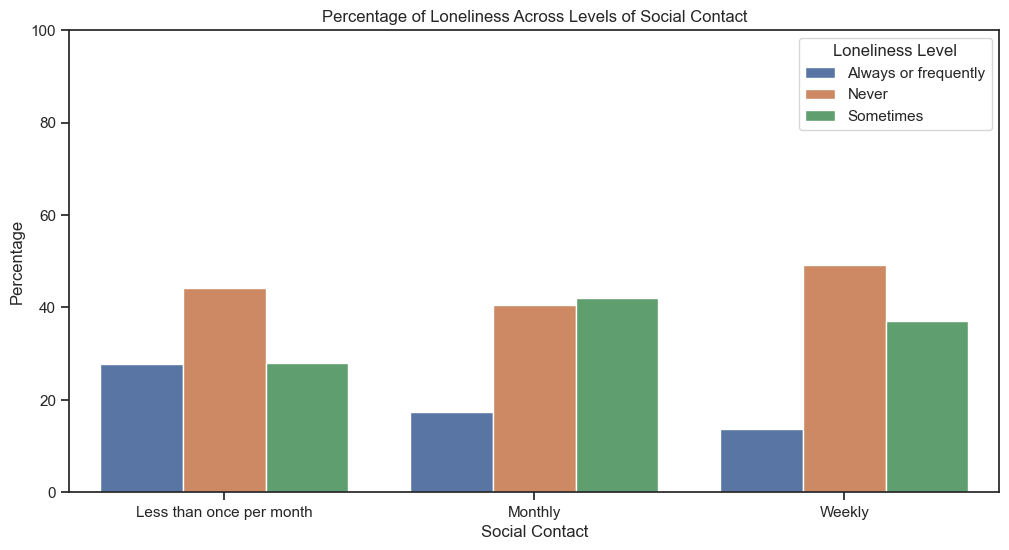

In [24]:
# Count the number of individuals in each category of social contact and loneliness
social_contact_by_loneliness = df.groupby(['social_contact', 'loneliness']).size().reset_index(name='count')

# Normalize the counts within each category of social contact
social_contact_total = social_contact_by_loneliness.groupby('social_contact')['count'].transform('sum')
social_contact_by_loneliness['percentage'] = (social_contact_by_loneliness['count'] / social_contact_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='social_contact', y='percentage', hue='loneliness', data=social_contact_by_loneliness, bottom=0)
plt.title('Percentage of Loneliness Across Levels of Social Contact')
plt.xlabel('Social Contact')
plt.ylabel('Percentage')
plt.legend(title='Loneliness Level')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


## Internet usage

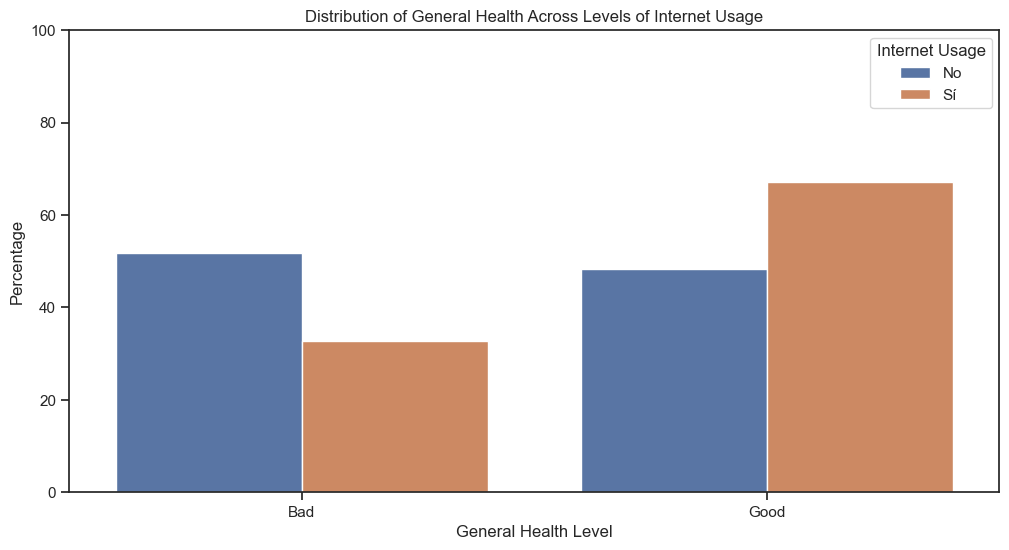

In [33]:
# Count the number of individuals in each category of general health and internet usage
health_by_int_use = df.groupby(['general_health', 'int_use']).size().reset_index(name='count')

# Normalize the counts within each category of general health
health_total = health_by_int_use.groupby('int_use')['count'].transform('sum')
health_by_int_use['percentage'] = (health_by_int_use['count'] / health_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='general_health', y='percentage', hue='int_use', data=health_by_int_use, bottom=0)
plt.title('Distribution of General Health Across Levels of Internet Usage')
plt.xlabel('General Health Level')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


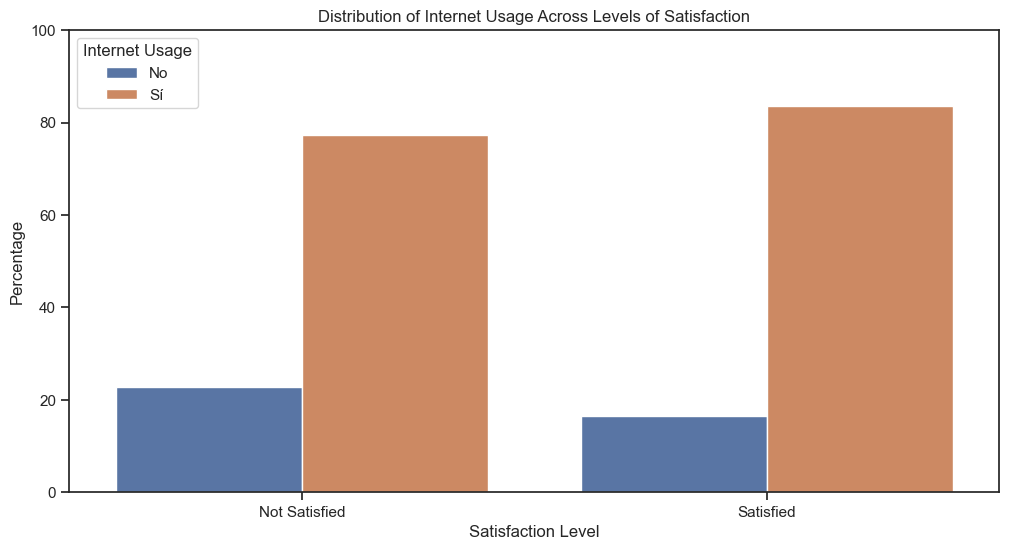

In [35]:
# Count the number of individuals in each category of satisfaction and internet usage
satisfaction_by_int_use = df.groupby(['satisfaction', 'int_use']).size().reset_index(name='count')

# Normalize the counts within each category of satisfaction
satisfaction_total = satisfaction_by_int_use.groupby('satisfaction')['count'].transform('sum')
satisfaction_by_int_use['percentage'] = (satisfaction_by_int_use['count'] / satisfaction_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='satisfaction', y='percentage', hue='int_use', data=satisfaction_by_int_use, bottom=0)
plt.title('Distribution of Internet Usage Across Levels of Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


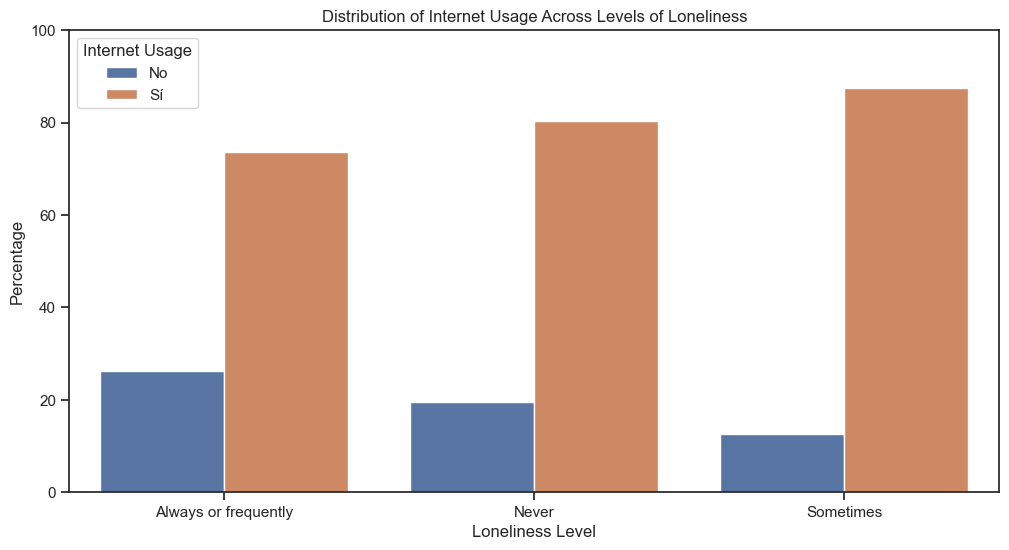

In [37]:
# Count the number of individuals in each category of loneliness and internet usage
loneliness_by_int_use = df.groupby(['loneliness', 'int_use']).size().reset_index(name='count')

# Normalize the counts within each category of loneliness
loneliness_total = loneliness_by_int_use.groupby('loneliness')['count'].transform('sum')
loneliness_by_int_use['percentage'] = (loneliness_by_int_use['count'] / loneliness_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='loneliness', y='percentage', hue='int_use', data=loneliness_by_int_use, bottom=0)
plt.title('Distribution of Internet Usage Across Levels of Loneliness')
plt.xlabel('Loneliness Level')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


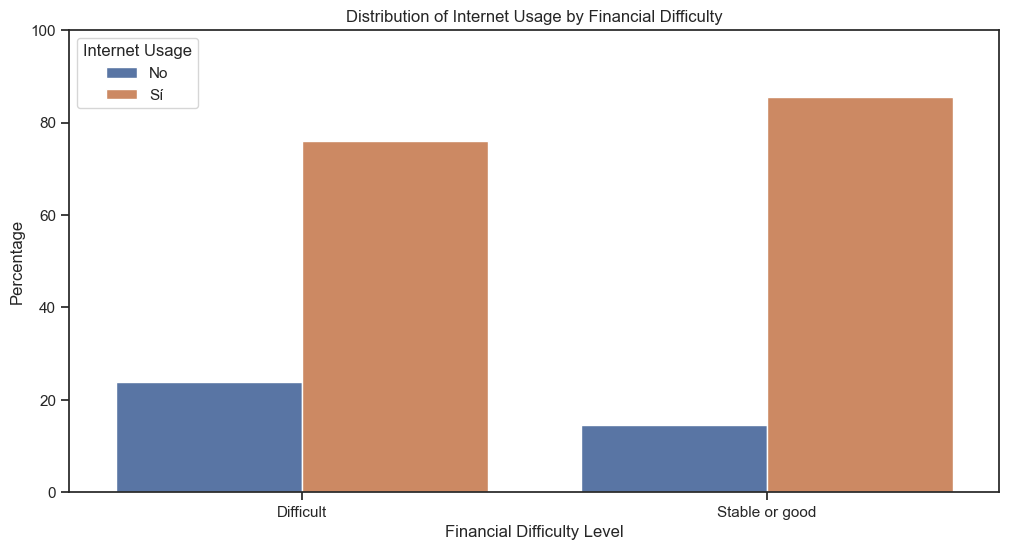

In [29]:
# Count the number of individuals with different levels of internet usage by financial difficulty
usage_by_financial = df.groupby(['financial', 'int_use']).size().reset_index(name='count')

# Normalize the counts within each level of internet usage
usage_total = usage_by_financial.groupby('financial')['count'].transform('sum')
usage_by_financial['percentage'] = (usage_by_financial['count'] / usage_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='financial', y='percentage', hue='int_use', data=usage_by_financial, bottom=0)
plt.title('Distribution of Internet Usage by Financial Difficulty')
plt.xlabel('Financial Difficulty Level')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


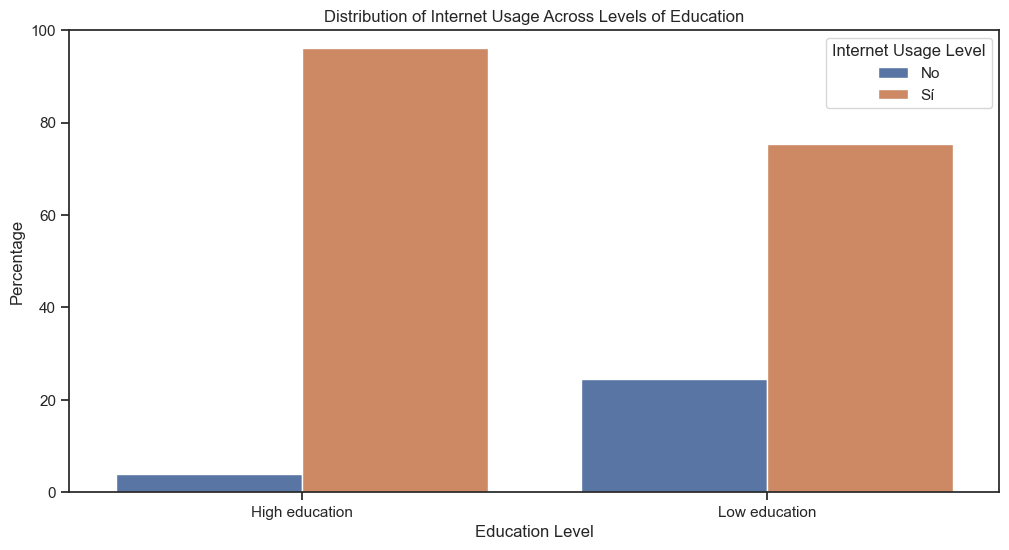

In [39]:
# Count the number of individuals with different levels of internet usage by education
usage_by_educ = df.groupby(['educ', 'int_use']).size().reset_index(name='count')

# Normalize the counts within each education level
usage_total = usage_by_educ.groupby('educ')['count'].transform('sum')
usage_by_educ['percentage'] = (usage_by_educ['count'] / usage_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='educ', y='percentage', hue='int_use', data=usage_by_educ, bottom=0)
plt.title('Distribution of Internet Usage Across Levels of Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage Level')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


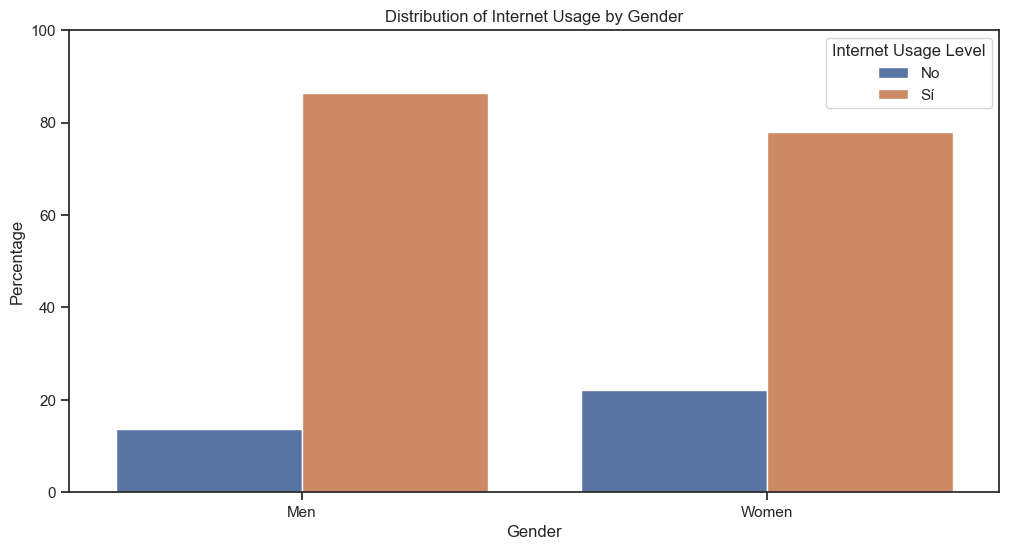

In [30]:
# Count the number of individuals with different levels of internet usage by gender
usage_by_gender = df.groupby(['sex', 'int_use']).size().reset_index(name='count')

# Normalize the counts within each gender
usage_total = usage_by_gender.groupby('sex')['count'].transform('sum')
usage_by_gender['percentage'] = (usage_by_gender['count'] / usage_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='percentage', hue='int_use', data=usage_by_gender, bottom=0)
plt.title('Distribution of Internet Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage Level')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


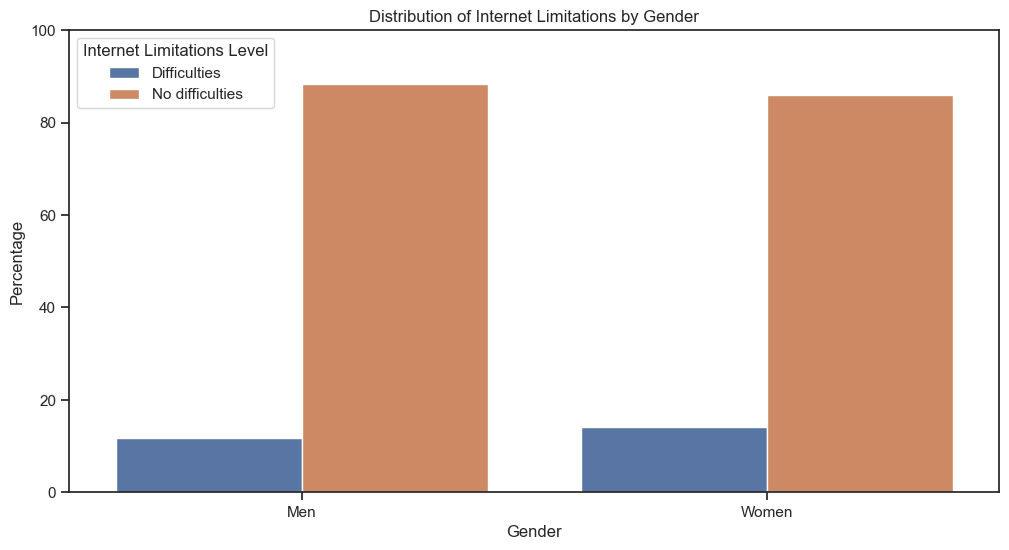

In [31]:
# Count the number of individuals with different levels of internet limitations by gender
limitations_by_gender = df.groupby(['sex', 'int_limitations']).size().reset_index(name='count')

# Normalize the counts within each gender
limitations_total = limitations_by_gender.groupby('sex')['count'].transform('sum')
limitations_by_gender['percentage'] = (limitations_by_gender['count'] / limitations_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='percentage', hue='int_limitations', data=limitations_by_gender, bottom=0)
plt.title('Distribution of Internet Limitations by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Internet Limitations Level')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


## Medical Help: Internet Use for Medical Help (Information, Appointment, Online Prescription, COVID Certificate)

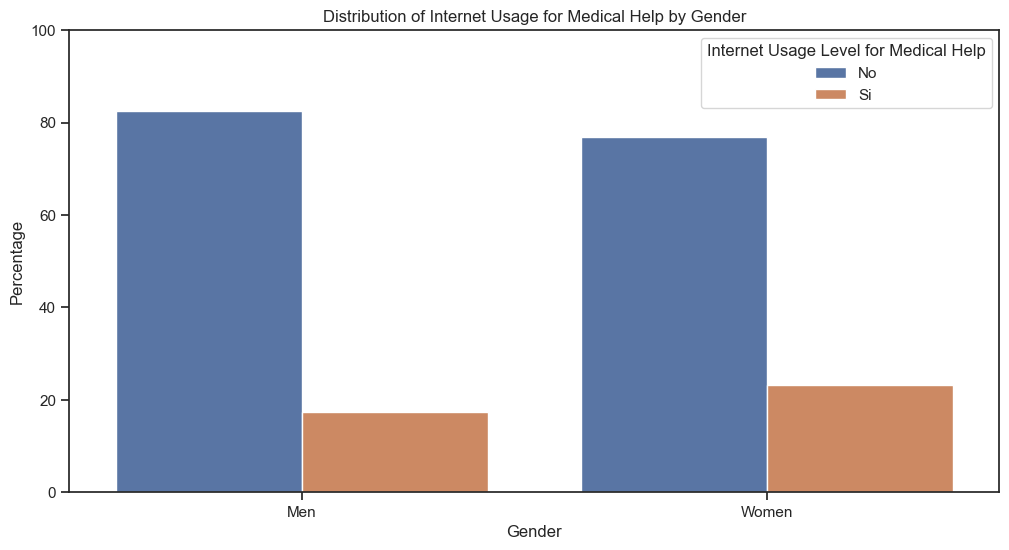

In [32]:
# Count the number of individuals with different levels of internet usage for medical help by gender
medical_help_by_gender = df.groupby(['sex', 'int_medical_help']).size().reset_index(name='count')

# Normalize the counts within each gender
medical_help_total = medical_help_by_gender.groupby('sex')['count'].transform('sum')
medical_help_by_gender['percentage'] = (medical_help_by_gender['count'] / medical_help_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='percentage', hue='int_medical_help', data=medical_help_by_gender, bottom=0)
plt.title('Distribution of Internet Usage for Medical Help by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage Level for Medical Help')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()


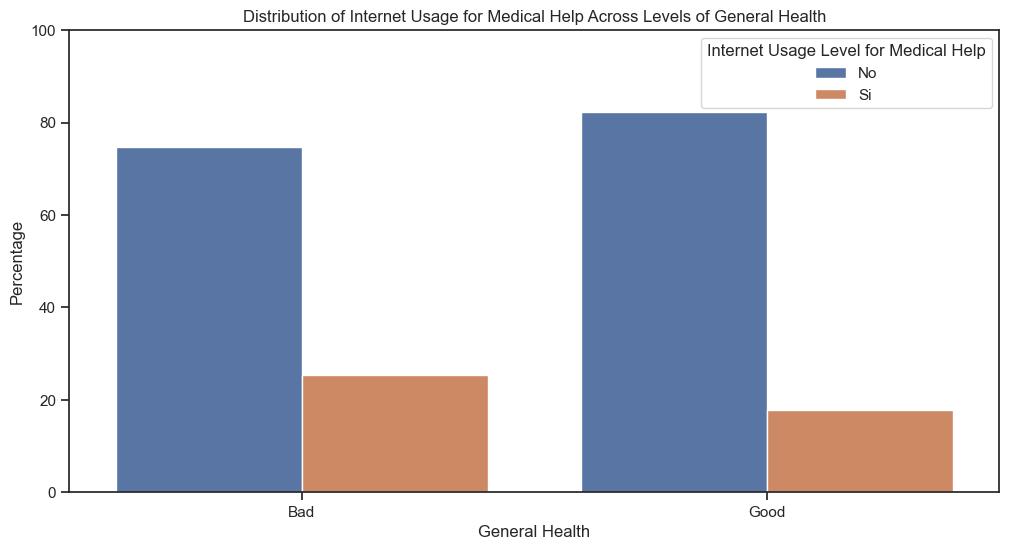

In [38]:
# Count the number of individuals with different levels of internet usage for medical help by general health
medical_help_by_health = df.groupby(['general_health', 'int_medical_help']).size().reset_index(name='count')

# Normalize the counts within each general health category
medical_help_total = medical_help_by_health.groupby('general_health')['count'].transform('sum')
medical_help_by_health['percentage'] = (medical_help_by_health['count'] / medical_help_total) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='general_health', y='percentage', hue='int_medical_help', data=medical_help_by_health, bottom=0)
plt.title('Distribution of Internet Usage for Medical Help Across Levels of General Health')
plt.xlabel('General Health')
plt.ylabel('Percentage')
plt.legend(title='Internet Usage Level for Medical Help')
plt.ylim(0, 100)  # Set the y-axis range
plt.show()
